In [1]:
from sqlalchemy import create_engine, MetaData, Table, Column, Integer, String
from datetime import datetime
import json

from backend.database import User
from sqlalchemy.orm import sessionmaker

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [20]:
from collections import defaultdict

data_path = 'spring_novice_play_data.jsonl'

question_rows = []
with open(data_path) as f:
    for line in f:
        row = json.loads(line)
        # filter out skips
        if not row['skipped'] and row['buzz_sentence_number']>=0:
            question_rows.append(row)

In [21]:
print(len(question_rows))

question_rows = pd.DataFrame(question_rows)
question_rows

1249


,actions,start_datetime,packet_number,evidence,buzz_sentence_number,answer_correct,evidence_score,question_id,username,skipped,answer,tfidf_search_map,override_decision,question_number,player_answer,score
0,"[{'time': 1621072844, 'name': 'next_sentence',...",2021-05-15 06:00:44.821309,1,"[but she grew up in Emmitsburg, MD where Eliza...",1,True,10,10,amao,False,Province of Maryland,"{'queries': ['Elizabeth Seton'], 'query_result...",null,1,maryland,50
1,"[{'time': 1621072901, 'name': 'next_sentence',...",2021-05-15 06:00:44.821309,1,"[After Rodin saw Claudel's ""The Mature Age"" fo...",1,True,30,11,amao,False,France,"{'queries': ['The Mature Age'], 'query_results...",null,2,France,100
2,"[{'time': 1621074005, 'name': 'next_sentence',...",2021-05-15 06:20:05.746056,1,[he established the first Catholic girls' scho...,1,True,10,10,eb.wolf@verizon.net,False,Province of Maryland,"{'queries': ['elizabeth seton'], 'query_result...",null,1,Maryland,50
3,"[{'time': 1621074165, 'name': 'document_action...",2021-05-15 06:20:05.746056,1,[Camille Claudel Camille Claudel (; 8 December...,1,True,30,11,eb.wolf@verizon.net,False,France,"{'queries': ['the mature age'], 'query_results...",null,2,France,100
4,"[{'time': 1621074220, 'name': 'next_sentence',...",2021-05-15 06:20:05.746056,1,[It harbors two pools of stem cells around an ...,1,True,40,12,eb.wolf@verizon.net,False,roots,"{'queries': ['quiescent center'], 'query_resul...",null,3,roots,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,"[{'time': 1621323383, 'name': 'next_sentence',...",2021-05-18 03:06:06.420206,1,"[ed in 1972, and Inga II in 1982. The two hydr...",2,True,190,122,FWang,False,dams,"{'queries': ['adrian daninos', 'inga'], 'query...",null,23,dam,820
1245,"[{'time': 1621323421, 'name': 'next_sentence',...",2021-05-18 03:06:06.420206,1,[ashing occurs when a computer's virtual],1,True,200,123,FWang,False,memory,"{'queries': ['thrashing', 'thrashing'], 'query...",null,24,memory,890
1246,"[{'time': 1621322654, 'name': 'next_sentence',...",2021-05-15 19:52:56.460886,7,"[General linear group In mathematics, the gene...",1,True,3140,719,SheepCanFly,False,matrices,{'queries': ['A representation is characterize...,null,92,matricxies,3590
1247,"[{'time': 1621323560, 'name': 'next_sentence',...",2021-05-15 19:52:56.460886,7,[rian Smith (architect) Adrian D. Smith (born ...,1,True,3260,720,SheepCanFly,False,Dubai,{'queries': ['One building in this city was de...,null,93,dubai,3640


count    1249.000000
mean        1.876701
std         1.239382
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: buzz_sentence_number, dtype: float64


Series([], Name: actions, dtype: object)

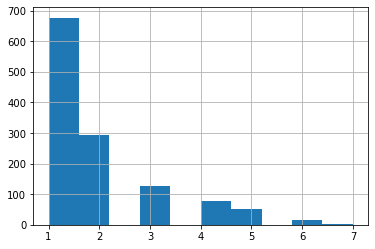

In [64]:
print(question_rows['buzz_sentence_number'].describe())
question_rows['buzz_sentence_number'].hist()
question_rows[question_rows['buzz_sentence_number'] < 0]['actions']

# tdf = question_rows[question_rows['buzz_sentence_number'] < 0]['actions']
# tdf.iloc[9]

In [221]:
# np.random.choice(question_rows['actions'])
for action in np.random.choice(question_rows['actions']):
    print(action['name'])
#     if action['name'] == 'search_documents':
#         print(action['data']['query'])

next_sentence
search_documents
select_document
next_sentence
next_sentence
search_documents
search_documents
document_actions
select_document
search_documents
search_documents
search_documents
select_document
document_actions
record_evidence
answer
document_actions


count    1249.000000
mean        1.952762
std         1.377536
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        15.000000
Name: next_sentence, dtype: float64


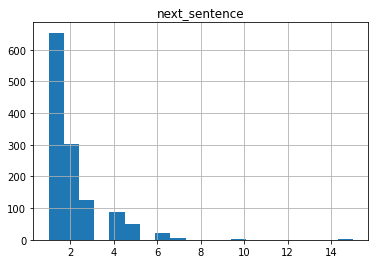

count    1249.000000
mean        2.606886
std         2.945278
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        37.000000
Name: search_documents, dtype: float64


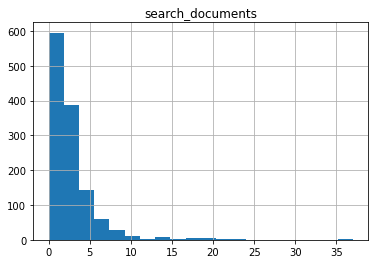

count    1249.000000
mean        2.564452
std         3.574422
min         0.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        42.000000
Name: select_document, dtype: float64


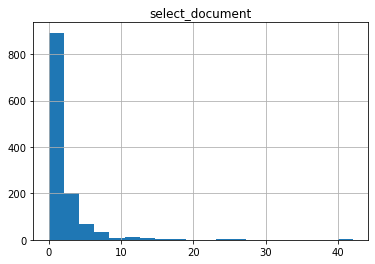

count    1249.000000
mean        0.638110
std         2.357888
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        40.000000
Name: advance_keyword_match, dtype: float64


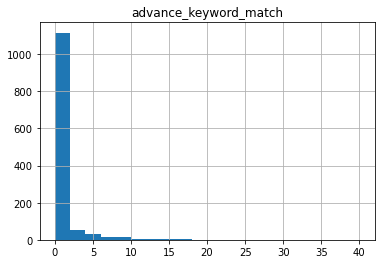

count    1249.000000
mean        1.321057
std         1.664162
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        25.000000
Name: record_evidence, dtype: float64


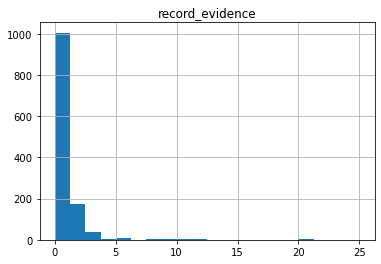

In [122]:
# summary stats
# there are unrealistic outliers, bugs in data collection?

def count_actions(actions, name):
    num_actions = 0
    for action in actions:
        if action['name'] == name:
            num_actions += 1
    return num_actions

for action_name in ['next_sentence','search_documents','select_document','advance_keyword_match','record_evidence']:
    question_rows[action_name] = question_rows['actions'].apply(lambda x: count_actions(x, action_name))
    print(question_rows[action_name].describe())
    ax = question_rows[action_name].hist(bins=20)
    ax.set_title(action_name)
    plt.show()

count    1249.000000
mean       15.859087
std        25.232432
min         0.000000
25%         3.000000
50%         7.000000
75%        20.000000
max       344.000000
Name: num_passages, dtype: float64


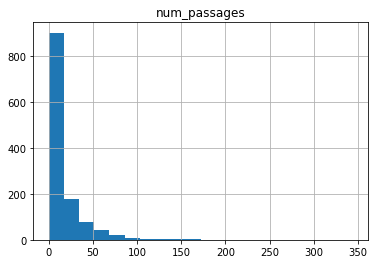

In [193]:
# number of passages viewed

def count_passages(actions):
    num_passages = 0
    for action in actions:
        if action['name'] == 'document_actions':
            passages=set()
            for event in action['data']['documentActions']['intersectionEvents']:
                if event['is_visible']: passages.add(event['passage_id'])
            num_passages += len(passages)
    return num_passages

action_name = 'num_passages'
question_rows[action_name] = question_rows['actions'].apply(lambda x: count_passages(x))
print(question_rows[action_name].describe())
ax = question_rows[action_name].hist(bins=20)
ax.set_title(action_name)
plt.show()
# (question_rows['search_documents']==0).sum()


In [76]:
# a play with a lot of searches

print(question_rows['search_documents'].sort_values())
top_rows = question_rows[question_rows['search_documents']==37]
print(top_rows)
for a in top_rows['actions'].iloc[0]:print(a)

1034     0
129      0
1192     0
764      0
1183     0
        ..
654     20
210     21
373     22
780     24
563     37
Name: search_documents, Length: 1249, dtype: int64
                                               actions  \
563  [{'time': 1621121985, 'name': 'next_sentence',...   

                 start_datetime  packet_number evidence  buzz_sentence_number  \
563  2021-05-15 16:35:30.389313              5       []                     3   

     answer_correct  evidence_score  question_id  username  skipped  ...  \
563            True             780           59  rcondron    False  ...   

                                      tfidf_search_map override_decision  \
563  {'queries': ['fox bribe railroad', 'fox bribe ...              null   

    question_number  player_answer score  next_sentence  search_documents  \
563              58        Soyinka  2830              3                37   

     select_document  advance_keyword_match  record_evidence  
563               17    

count    1249.000000
mean        0.995753
std         0.043730
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: next_sentence, dtype: float64


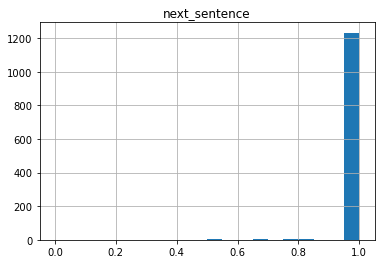

count    1249.000000
mean        1.452615
std         1.267974
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        12.333333
Name: search_documents, dtype: float64


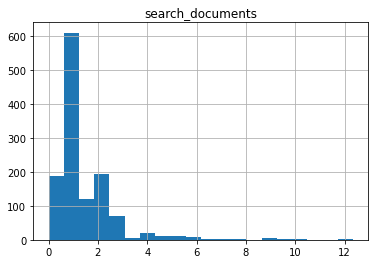

count    1249.000000
mean        1.480647
std         1.759510
min         0.000000
25%         0.750000
50%         1.000000
75%         2.000000
max        28.000000
Name: select_document, dtype: float64


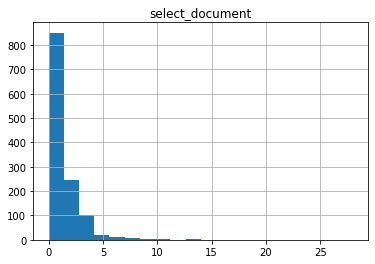

In [121]:
# avg queries, docs selected per sentence

def count_actions_per_sentence(actions, name):
    counts = []
    indices = [i for i, x in enumerate(actions) if x['name'] == "next_sentence" or x['name'] == "answer"]
    for i in range(len(indices)-1):
        start, end = indices[i], indices[i+1]
        count=0
        for action in actions[start:end]:
            if action['name'] == name: count+=1
        counts.append(count)
    return sum(counts)/len(counts)
    

for action_name in ['next_sentence','search_documents','select_document']:
    action_name = f'{action_name}_sentence'
    question_rows[action_name] = question_rows['actions'].apply(lambda x: count_actions_per_sentence(x, action_name))
    print(question_rows[action_name].describe())
    ax = question_rows[action_name].hist(bins=20)
    ax.set_title(action_name)
    plt.show()

In [117]:
# load question data

question_data_path = 'spring_novice_questions.jsonl'
questions = []
with open(question_data_path) as f:
    for line in f:
        questions.append(json.loads(line))

# questions[0]
questions = pd.DataFrame(questions)
questions['id'] = questions['id'].astype(int)
questions = questions.set_index('id')
questions

,question,answer,sentence_tokenizations,question_num,packet_num,other_data
id,,,,,,
40,Immigrants from this country staged a prison r...,Republic of Cuba,"[[0, 109], [110, 213], [214, 358], [359, 469],...",1,4,"<JD, History - American History>"
41,George Santayana defined this concept as “obje...,beauty,"[[0, 105], [106, 224], [225, 358], [359, 413],...",2,4,"<Ryan, Beliefs - Philosophy>"
42,Obsidian Cliff in this national park is the mo...,Yellowstone National Park,"[[0, 106], [107, 226], [227, 340], [341, 441],...",3,4,"<CL, The World - Geography>"
43,A speech given by an author from this country ...,Nigeria,"[[0, 150], [151, 252], [253, 364], [365, 458],...",4,4,"<AL, Literature - Short Fiction>"
44,This planet’s moon Galatea causes its outermos...,Neptune,"[[0, 89], [90, 237], [238, 364], [365, 496], [...",5,4,"<DB, Science - Other Science - Astronomy>"
...,...,...,...,...,...,...
1019,A midrash (“MID-rosh”) about this man tells t...,Jonah,"[[0, 123], [124, 250], [251, 380], [381, 548],...",20,10,"<KT, Beliefs - Religion>"
1020,A 30% solution of this compound is employed i...,hydrogen peroxide,"[[0, 138], [139, 230], [231, 359], [360, 464],...",21,10,"<SF, Science - Chemistry>"
1021,A thinker from this country coined a word for...,Italy [or Italia],"[[0, 131], [132, 282], [283, 395], [396, 482],...",22,10,"<CA, Beliefs - Philosophy>"


In [192]:
# examine queries
# row = np.random.choice(question_rows)
row = question_rows.sample().iloc[0]
qid = row['question_id']
question = questions.loc[qid]['question']
print(question)
print()
print('queries:')
for action in row['actions']:
#     print(action)
    if action['name'] == 'search_documents':
        print(action['data']['query'])

 Glyphs resembling this island’s namesake system of hieroglyphics were found on an object discovered by Luigi Pernier known as the Phaistos Disc. The downfall of a civilization on this island who wrote in Linear A is thought to have been triggered by the Thera (*) eruption. A fresco depicting a leaping bull was discovered on this island’s palace complex at Knossos, which Sir Arthur Evans identified with the labyrinth. For 10 points, the story of Atlantis was likely inspired by the fall of the Minoan civilization centered on what largest Greek island?

queries:
phaistos disc


In [105]:
import re

def parse_other_data(x):
#     return re.search('^<.*, (.*)>$', x)
    match = re.search('^<.*, ([\w| ]+) -.*>$', x)
    if match: return match.group(1)
    else: return None

# match = parse_other_data('<JD, History - American History>')
# print(match)
# print(match.group(1))

questions['category'] = questions['other_data'].apply(parse_other_data)
questions['category'].value_counts()

Science           40
Literature        39
History           35
Arts              24
Beliefs           24
The World         20
Pop Culture       17
Social Science    14
Fine Arts          5
Name: category, dtype: int64

count    1249.000000
mean        3.491286
std         4.408978
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        37.000000
Name: query_length, dtype: float64


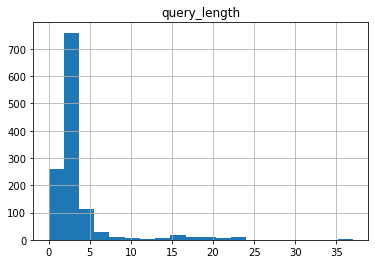

3256


In [150]:
# query length

def avg_query_length(row):
    query_lengths=[]
    for action in row['actions']:
        if action['name'] == 'search_documents':
            query_lengths.append(len(action['data']['query'].split()))
    if query_lengths: return sum(query_lengths)/len(query_lengths)
    else: return 0 

action_name = 'query_length'
question_rows[action_name] = question_rows.apply(lambda x: avg_query_length(x), axis=1)
print(question_rows[action_name].describe())
ax = question_rows[action_name].hist(bins=20)
ax.set_title(action_name)
plt.show()


3256
Counter({1: 1802, 0: 1454})
3256
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
2101


Text(0.5, 1.0, 'histogram of query token overlap with question')

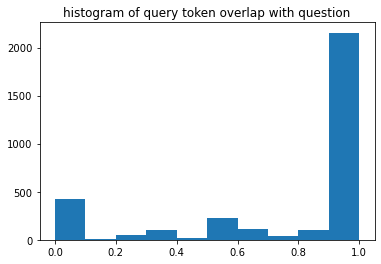

In [324]:
# avg token overlap of query with question
# normalize case

from collections import Counter
from nltk.tokenize import word_tokenize

def question_overlap(row, query_matches):
    qid = row['question_id']
#     question = questions.loc[qid]['question'].lower()
    
    sentence_num = row['buzz_sentence_number']
    slice_idxs = json.loads(questions.loc[qid]['sentence_tokenizations'])[sentence_num-1]
    # slice the question to when they answered
    question = questions.loc[qid]['question'][0:slice_idxs[1]].lower()
    
    overlaps=[]
    for action in row['actions']:
        if action['name'] == 'search_documents':
            if action['data']['query'].lower() in question: query_matches.append(1)
            else: query_matches.append(0)
#     if overlaps: return sum(overlaps)/len(overlaps)
#     else: return None

def question_token_overlap(row, query_matches):
    qid = row['question_id']
#     question = questions.loc[qid]['question']
    sentence_num = row['buzz_sentence_number']
    slice_idxs = json.loads(questions.loc[qid]['sentence_tokenizations'])[sentence_num-1]
    question = questions.loc[qid]['question'][0:slice_idxs[1]].lower()
    
    question_tokens = set(word_tokenize(question.lower()))
    
    overlaps=[]
    for action in row['actions']:
        if action['name'] == 'search_documents':
            query_tokens = set(word_tokenize(action['data']['query'].lower()))
            overlap = len(query_tokens & question_tokens)/len(query_tokens)
            query_matches.append(overlap)
#     if overlaps: return sum(overlaps)/len(overlaps)
#     else: return None


query_matches = []
question_rows.apply(lambda x: question_overlap(x,query_matches), axis=1)
print(len(query_matches))
print(Counter(query_matches))

query_matches = []
question_rows.apply(lambda x: question_token_overlap(x,query_matches), axis=1)
print(len(query_matches))
print(sorted(query_matches)[-10:])
print((np.array(query_matches)==1).sum())

plt.hist(query_matches)
plt.title('histogram of query token overlap with question')

# there are a decent number of queries that aren't simple copy-paste, maybe more interesting strategies

1.0    815
0.0    404
Name: last_query_overlap, dtype: int64
880


Text(0.5, 1.0, 'histogram of query token overlap with question')

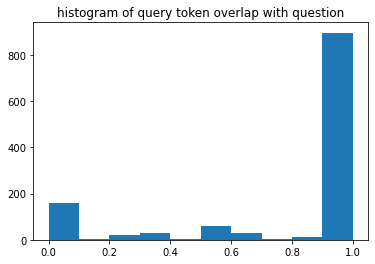

In [342]:
def question_overlap(row, query_matches):
    qid = row['question_id']
    sentence_num = row['buzz_sentence_number']
    slice_idxs = json.loads(questions.loc[qid]['sentence_tokenizations'])[sentence_num-1]
#     print('slice', slice_idxs, ' ', len(questions.loc[qid]['question']))
    question = questions.loc[qid]['question'][0:slice_idxs[1]].lower()
    
    overlaps=[]
    for action in row['actions']:
        if action['name'] == 'search_documents':
            if action['data']['query'].lower() in question: overlaps.append(1)
            else: overlaps.append(0)
#     if overlaps: query_matches.append(overlaps[-1])
    if overlaps: return overlaps[-1]
    else: return None

def question_token_overlap(row, query_matches):
    qid = row['question_id']
#     question = questions.loc[qid]['question']
    sentence_num = row['buzz_sentence_number']
    slice_idxs = json.loads(questions.loc[qid]['sentence_tokenizations'])[sentence_num-1]
    question = questions.loc[qid]['question'][0:slice_idxs[1]].lower()

    question_tokens = set(word_tokenize(question.lower()))
    
    overlaps=[]
    for action in row['actions']:
        if action['name'] == 'search_documents':
            query_tokens = set(word_tokenize(action['data']['query'].lower()))
            overlap = len(query_tokens & question_tokens)/len(query_tokens)
            overlaps.append(overlap)
    if overlaps: return overlaps[-1]
    else: return None


query_matches = []
question_rows['last_query_overlap'] = question_rows.apply(lambda x: question_overlap(x,query_matches), axis=1)
print(question_rows['last_query_overlap'].value_counts())

# query_matches = []
question_rows['last_query_token_overlap'] = question_rows.apply(lambda x: question_token_overlap(x,query_matches), axis=1)
print((question_rows['last_query_token_overlap']==1).sum())

plt.hist(question_rows['last_query_token_overlap'])
plt.title('histogram of query token overlap with question')

In [352]:
# look at a sample of rows for queries that don't match

row = question_rows[question_rows['last_query_token_overlap']<1].sample(1).iloc[0]

qid = row['question_id']
#     question = questions.loc[qid]['question']
sentence_num = row['buzz_sentence_number']
print(sentence_num)
slice_idxs = json.loads(questions.loc[qid]['sentence_tokenizations'])[sentence_num-1]
question = questions.loc[qid]['question'][0:slice_idxs[1]]
    
# question = questions.loc[qid]['question']
print(question)
    
print('\nqueries:')
for action in row['actions']:
    if action['name'] == 'search_documents':
        print(action['data']['query'])
print('\nselected documents:')
for action in row['actions']:
    if action['name'] == 'select_document':
        print(action['data']['page_title'])
print('\nanswer: ' + row['player_answer'])

2
 In a myth from this country, a monster that looks like a beautiful woman smiles at young men to seduce them before killing them with her barbed hair. Hearing the laughter of other deities, this country’s sun goddess looked out of her cave, only to be dazzled by her reflection in a (*) mirror.

queries:
baba yaga
shinto monsters
shinto kami
japanese monsters
japanese monsters barbed hair
yokai
yokai monster
yokai
yokai barb
yokai barbed hair
yokai barbed hair seduce
shinto yokai
water yokai
drown yokai
amaterasu

selected documents:
Baba Yaga
Konkokyo
Shinto
Kami
Yokai Dochuki
Yokai Monsters
Yokai Dochuki
Yasunori Katō
Nioh
A Letter to Momo
The Yokai King
Yokai Monsters: One Hundred Monsters
A Letter to Momo
Amaterasu

answer: Japan


In [354]:
!pip install requests
import requests

DRQA_RETRIEVER_URL = 'http://127.0.0.1:5000'

def get_passages(page_title):
    r = requests.get(f"{DRQA_RETRIEVER_URL}/get_document_passages/{page_title}")
    if r.status_code != requests.codes.ok:
        print("Error in getting document")

    # print("getting doc: ", r.json()['id'])
    # game_manager.state['tfidf_search_map']['documents_selected'].append(r.json())
    return r.json()

get_passages("Python")

     |████████████████████████████████| 61 kB 5.5 MB/s  eta 0:00:01
     |████████████████████████████████| 58 kB 5.5 MB/s  eta 0:00:01
     |████████████████████████████████| 178 kB 36.6 MB/s eta 0:00:01
     |████████████████████████████████| 138 kB 33.9 MB/s eta 0:00:01


ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: /get_document_passages/Python (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f1c57423748>: Failed to establish a new connection: [Errno 111] Connection refused',))

In [ ]:
# find queries that are in the passages

def passage_overlap(row, query_matches):
    qid = row['question_id']
    sentence_num = row['buzz_sentence_number']
    slice_idxs = json.loads(questions.loc[qid]['sentence_tokenizations'])[sentence_num-1]
    question = questions.loc[qid]['question'][0:slice_idxs[1]].lower()
    
    
    overlaps=[]
    for action in row['actions']:
        if action['name'] == 'search_documents':
            if action['data']['query'].lower() in question: overlaps.append(1)
            else: overlaps.append(0)
#     if overlaps: query_matches.append(overlaps[-1])
    if overlaps: return overlaps[-1]
    else: return None

# def question_token_overlap(row, query_matches):
#     qid = row['question_id']
# #     question = questions.loc[qid]['question']
#     sentence_num = row['buzz_sentence_number']
#     slice_idxs = json.loads(questions.loc[qid]['sentence_tokenizations'])[sentence_num-1]
#     question = questions.loc[qid]['question'][0:slice_idxs[1]].lower()

#     question_tokens = set(word_tokenize(question.lower()))
    
#     overlaps=[]
#     for action in row['actions']:
#         if action['name'] == 'search_documents':
#             query_tokens = set(word_tokenize(action['data']['query'].lower()))
#             overlap = len(query_tokens & question_tokens)/len(query_tokens)
#             overlaps.append(overlap)
#     if overlaps: return overlaps[-1]
#     else: return None


query_matches = []
question_rows['last_query_overlap'] = question_rows.apply(lambda x: question_overlap(x,query_matches), axis=1)
print(question_rows['last_query_overlap'].value_counts())

# query_matches = []
# question_rows['last_query_token_overlap'] = question_rows.apply(lambda x: question_token_overlap(x,query_matches), axis=1)
# print((question_rows['last_query_token_overlap']==1).sum())

# plt.hist(question_rows['last_query_token_overlap'])
# plt.title('histogram of query token overlap with question')

In [ ]:
# minimal actions

def create_minimal_actions(actions):
    
    minimal_actions=[]
    cur_minimal_actions={}
    for action in actions:
        if action['name'] == 'document_actions': 
            cur_minimal_actions[action['name']] = action
        elif action['name'] == 'record_evidence' or action['name'] == 'answer':
            cur_minimal_actions[action['name']] = action
            minimal_actions.append(cur_minimal_actions)
            cur_minimal_actions={}
#         elif action['name'] == 'answer':
#             if cur_minimal_actions={}:
#                 minimal_actions[-1]['answer'] = action
#             else: 
        else:
            cur_minimal_actions[action['name']] = action # replaces old actions
    return minimal_actions


action_name = 'minimal_actions'
question_rows[action_name] = question_rows['actions'].apply(lambda x: create_minimal_actions(x))

In [ ]:
# examine minimal actions
# row = np.random.choice(question_rows)
row = question_rows.sample().iloc[0]
qid = row['question_id']
question = questions.loc[qid]['question']
print(question)

print('\nqueries:')
for action in row['actions']:
    if action['name'] == 'search_documents':
        print(action['data']['query'])
print('\nselected documents:')
for action in row['actions']:
    if action['name'] == 'select_document':
        print(action['data']['page_title'])

print('\nminimal actions')
for action in row['minimal_actions']:
    if 'search_documents' in action: print(action['search_documents'])
    if 'select_document' in action: print(action['select_document'])
    if 'record_evidence' in action: print(action['record_evidence'])
    if 'answer' in action: print(action['answer'])

                       next_sentence  search_documents  select_document  \
next_sentence               1.000000          0.347553         0.237477   
search_documents            0.347553          1.000000         0.696588   
select_document             0.237477          0.696588         1.000000   
advance_keyword_match       0.022362          0.189608         0.159830   
record_evidence            -0.038119          0.041138         0.266804   
num_passages                0.222429          0.655059         0.764395   
query_length               -0.036257          0.065430         0.210570   

                       advance_keyword_match  record_evidence  num_passages  \
next_sentence                       0.022362        -0.038119      0.222429   
search_documents                    0.189608         0.041138      0.655059   
select_document                     0.159830         0.266804      0.764395   
advance_keyword_match               1.000000         0.005946      0.324771   
reco

<AxesSubplot:>

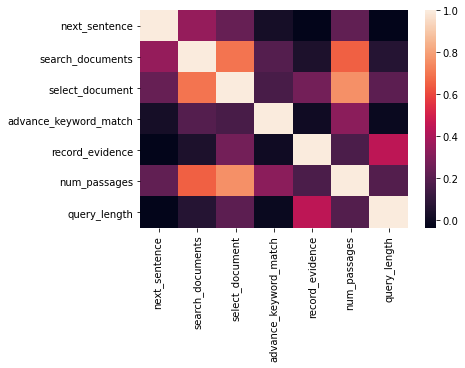

In [200]:
# correlations

import seaborn as sns
features_df = question_rows[['next_sentence','search_documents','select_document','advance_keyword_match','record_evidence','num_passages','query_length']]
corr = features_df.corr()
print(corr)
sns.heatmap(corr)

In [215]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca = make_pipeline(StandardScaler(),PCA(n_components=2)).fit(features_df)
print(pca.steps[1][1].explained_variance_ratio_)

X_embedded = pca.transform(features_df)
features_df['x'] = X_embedded[:,0]
features_df['y'] = X_embedded[:,1]
# plt.scatter(features_df['x'],features_df['y'])
fig = px.scatter(features_df, x="x", y="y", color="num_passages",
                 size='query_length', hover_data=['search_documents','select_document','next_sentence','record_evidence'])
fig.show()

[0.39702707 0.17109189]


/home/amao1/miniconda3/envs/datasci/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/amao1/miniconda3/envs/datasci/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [216]:
# clusters?
# predict the player?

from sklearn.manifold import TSNE
import plotly.express as px

tsne = make_pipeline(StandardScaler(),TSNE(n_components=2)).fit(features_df)

X_embedded = tsne.fit_transform(features_df)
print(X_embedded.shape)
features_df['x'] = X_embedded[:,0]
features_df['y'] = X_embedded[:,1]


fig = px.scatter(features_df, x="x", y="y", color="search_documents",
                 size='query_length', hover_data=['select_document','next_sentence','record_evidence','num_passages'])
fig.show()

(1249, 2)


/home/amao1/miniconda3/envs/datasci/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/amao1/miniconda3/envs/datasci/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [207]:
fig = px.scatter(features_df, x="x", y="y", color="search_documents",
                 size='query_length', hover_data=['select_document','next_sentence','record_evidence','num_passages'])
fig.show()

In [57]:
# action transition frequencies

def count_transitions(actions, transition_cnts):
    actions = filter(lambda x: x['name'] in {'next_sentence','search_documents','select_document','answer'}, actions)
    actions = [x['name'] for x in actions]
#     print(actions)
    transition_cnts['start'][actions[0]] += 1
    for i in range(len(actions)-1):
        transition_cnts[actions[i]][actions[i+1]] += 1

transition_cnts = dict()
for k in ['start','next_sentence','search_documents','select_document','answer']:
    transition_cnts[k] = defaultdict(int)

for action_list in question_rows['actions']:
#     print(action_list)
#     print(action_list)
    count_transitions(action_list, transition_cnts)

del transition_cnts['answer']
del transition_cnts['start']['answer']
del transition_cnts['start']['answer']

transition_cnts
# there are impossible transitions here
    


{'start': defaultdict(int, {'next_sentence': 1248}),
 'next_sentence': defaultdict(int,
             {'next_sentence': 522,
              'search_documents': 1825,
              'answer': 81,
              'select_document': 6}),
 'search_documents': defaultdict(int,
             {'select_document': 2152,
              'search_documents': 805,
              'next_sentence': 219,
              'answer': 80}),
 'select_document': defaultdict(int,
             {'answer': 1095,
              'search_documents': 626,
              'select_document': 1041,
              'next_sentence': 438})}

In [58]:
import plotly.graph_objects as go

labels=['start','next_sentence','search_documents','select_document','answer']
label_colors=['red','orange','green','blue','purple']

link_colors=[]
source, target, value = [],[],[]
for k1,v1 in transition_cnts.items():
    for k2,v2 in v1.items():
        source.append(labels.index(k1))
        target.append(labels.index(k2))
        value.append(v2)
        link_colors.append(label_colors[labels.index(k1)])

print(source, target, value)

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = labels,
      color = label_colors
    ),
    link = dict(
      source = source, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = target,
      value = value,
      color=link_colors
  ))])

fig.update_layout(title_text="Cheater's Bowl Action Transitions", font_size=10, margin=dict(l=20, r=20, t=200, b=20),)
fig.show()

[0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3] [1, 1, 2, 4, 3, 3, 2, 1, 4, 4, 2, 3, 1] [1248, 522, 1825, 81, 6, 2152, 805, 219, 80, 1095, 626, 1041, 438]


0       [{'next_sentence': {'time': 1621072877, 'name'...
1       [{'next_sentence': {'time': 1621072901, 'name'...
2       [{'next_sentence': {'time': 1621074005, 'name'...
3       [{'document_actions': {'time': 1621074165, 'na...
4       [{'next_sentence': {'time': 1621074220, 'name'...
                              ...                        
1244    [{'next_sentence': {'time': 1621323394, 'name'...
1245    [{'next_sentence': {'time': 1621323421, 'name'...
1246    [{'next_sentence': {'time': 1621322654, 'name'...
1247    [{'next_sentence': {'time': 1621323560, 'name'...
1248    [{'next_sentence': {'time': 1621323900, 'name'...
Name: minimal_actions, Length: 1249, dtype: object

 This character draws a charcoal of the Florence Cathedral from memory, and mocks a woman’s West Virginian accent after she hands him a questionnaire. This character falsely names a former acquaintance as “Louis Friend,” an anagram for iron sulfide. Before making an improvised slurping sound, this character recalls a meal that included “some (*) fava beans and a nice Chianti.” This character impersonates a man who brings him a dinner of extra-rare lamb by skinning his face and wearing it like a mask, allowing this character to escape prison. For 10 points, name this cannibalistic former psychiatrist played by Anthony Hopkins who helps Clarice Starling catch a serial killer in The Silence of the Lambs.

queries:
Florence Cathedral
charcoal of the Florence Cathedral
West Virginian accent 
West Virginian accent florence cathedral
“Louis Friend,”

selected documents:
The Silence of the Lambs (film)

minimal actions
{'time': 1621115178, 'name': 'search_documents', 'data': {'query': '“Louis 

In [ ]:
# do searches before answering overlap with the question? If not, this may indicate multi-hop reasoning

def question_overlap(row, query_matches):
    qid = row['question_id']
    question = questions.loc[qid]['question']
    
    overlaps=[]
    for action in row['actions']:
        if action['name'] == 'search_documents':
            if action['data']['query'] in question: query_matches.append(1)
            else: query_matches.append(0)
#     if overlaps: return sum(overlaps)/len(overlaps)
#     else: return None

def question_token_overlap(row, query_matches):
    qid = row['question_id']
    question = questions.loc[qid]['question']
    question_tokens = set(word_tokenize(question.lower()))
    
    overlaps=[]
    for action in row['actions']:
        if action['name'] == 'search_documents':
            query_tokens = set(word_tokenize(action['data']['query'].lower()))
            overlap = len(query_tokens & question_tokens)/len(query_tokens)
            query_matches.append(overlap)
#     if overlaps: return sum(overlaps)/len(overlaps)
#     else: return None


query_matches = []
question_rows.apply(lambda x: question_overlap(x,query_matches), axis=1)
print(len(query_matches))
print(Counter(query_matches))

query_matches = []
question_rows.apply(lambda x: question_token_overlap(x,query_matches), axis=1)
print(len(query_matches))
print(sorted(query_matches)[-10:])

plt.hist(query_matches)
plt.title('histogram of query token overlap with question')

# action_name = 'query_question_match'
# question_rows[action_name] = question_rows.apply(lambda x: question_overlap(x), axis=1)
# print(question_rows[action_name].describe())
# ax = question_rows[action_name].hist(bins=20)
# ax.set_title(action_name)
# plt.show()

In [10]:
## old

from collections import defaultdict

data_path = 'spring_novice_play_data.jsonl'

question_rows = defaultdict(list)
with open(data_path) as f:
    for line in f:
        row = json.loads(line)
        # filter out skips
        if not row['skipped']:
            question_rows[row['question_id']].append(row)

In [11]:
# question_rows.keys()
# len(question_rows)
# question_rows[10]

In [12]:
import pandas as pd
# distribution of query length

# aggregate results for a question

def analyze_question(question_id):
    # number of queries
    # number of document selections
    # number of passages
    processed_rows = []
    for row in question_rows[question_id]:
        num_sentences, num_queries, num_selections, num_passages = 0,0,0,0
        passage_queries, question_queries, other_queries = 0,0,0
        for action in row['actions']:
            if action['name'] == 'next_sentence':
                num_sentences += 1
            if action['name'] == 'search_documents':
                num_queries += 1
                origin = action['data']['origin']
                if origin == 'contentpassageSearch': passage_queries += 1
                if origin == 'questionText': question_queries += 1
                elif origin == 'passage': other_queries += 1

            elif action['name'] == 'select_document': 
                num_selections += 1
#             elif action['name'] == 'select_document': 
        processed_rows.append({'num_sentences':num_sentences, 
                               'num_queries':num_queries, 
                               'num_selections':num_selections, 
                               'passage_queries':passage_queries,
                              'question_queries':question_queries,
                              'other_queries':other_queries})
    return processed_rows

def get_question(qid):
    s = spring_novice_data.select().where(spring_novice_data.c.id == qid)
    conn = engine.connect()
    result = conn.execute(s)
    row = list(result)[0]
#     print(row)
    return row



In [13]:
question_stats = []
for qid in question_rows.keys():
    processed_rows = analyze_question(qid)
    df = pd.DataFrame(processed_rows)
    stats = df.mean()
    stats['question_id'] = qid
    q_row = get_question(qid)
    stats['question'] = q_row[1]
    stats['answer'] = q_row[2]
    question_stats.append(stats)


2021-05-23 22:44:46,156 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,156 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,157 INFO sqlalchemy.engine.Engine [generated in 0.00159s] (10,)


2021-05-23 22:44:46,157 - INFO - sqlalchemy.engine.Engine - [generated in 0.00159s] (10,)


2021-05-23 22:44:46,168 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,168 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,169 INFO sqlalchemy.engine.Engine [cached since 0.01308s ago] (11,)


2021-05-23 22:44:46,169 - INFO - sqlalchemy.engine.Engine - [cached since 0.01308s ago] (11,)


2021-05-23 22:44:46,178 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,178 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,180 INFO sqlalchemy.engine.Engine [cached since 0.02394s ago] (12,)


2021-05-23 22:44:46,180 - INFO - sqlalchemy.engine.Engine - [cached since 0.02394s ago] (12,)


2021-05-23 22:44:46,186 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,186 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,188 INFO sqlalchemy.engine.Engine [cached since 0.03189s ago] (13,)


2021-05-23 22:44:46,188 - INFO - sqlalchemy.engine.Engine - [cached since 0.03189s ago] (13,)


2021-05-23 22:44:46,195 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,195 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,196 INFO sqlalchemy.engine.Engine [cached since 0.04016s ago] (14,)


2021-05-23 22:44:46,196 - INFO - sqlalchemy.engine.Engine - [cached since 0.04016s ago] (14,)


2021-05-23 22:44:46,205 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,205 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,206 INFO sqlalchemy.engine.Engine [cached since 0.04997s ago] (15,)


2021-05-23 22:44:46,206 - INFO - sqlalchemy.engine.Engine - [cached since 0.04997s ago] (15,)


2021-05-23 22:44:46,214 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,214 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,216 INFO sqlalchemy.engine.Engine [cached since 0.06005s ago] (16,)


2021-05-23 22:44:46,216 - INFO - sqlalchemy.engine.Engine - [cached since 0.06005s ago] (16,)


2021-05-23 22:44:46,223 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,223 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,225 INFO sqlalchemy.engine.Engine [cached since 0.06933s ago] (17,)


2021-05-23 22:44:46,225 - INFO - sqlalchemy.engine.Engine - [cached since 0.06933s ago] (17,)


2021-05-23 22:44:46,232 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,232 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,234 INFO sqlalchemy.engine.Engine [cached since 0.07781s ago] (18,)


2021-05-23 22:44:46,234 - INFO - sqlalchemy.engine.Engine - [cached since 0.07781s ago] (18,)


2021-05-23 22:44:46,241 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,241 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,242 INFO sqlalchemy.engine.Engine [cached since 0.08655s ago] (19,)


2021-05-23 22:44:46,242 - INFO - sqlalchemy.engine.Engine - [cached since 0.08655s ago] (19,)


2021-05-23 22:44:46,249 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,249 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,251 INFO sqlalchemy.engine.Engine [cached since 0.09508s ago] (110,)


2021-05-23 22:44:46,251 - INFO - sqlalchemy.engine.Engine - [cached since 0.09508s ago] (110,)


2021-05-23 22:44:46,257 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,257 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,259 INFO sqlalchemy.engine.Engine [cached since 0.103s ago] (111,)


2021-05-23 22:44:46,259 - INFO - sqlalchemy.engine.Engine - [cached since 0.103s ago] (111,)


2021-05-23 22:44:46,265 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,265 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,267 INFO sqlalchemy.engine.Engine [cached since 0.1109s ago] (112,)


2021-05-23 22:44:46,267 - INFO - sqlalchemy.engine.Engine - [cached since 0.1109s ago] (112,)


2021-05-23 22:44:46,273 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,273 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,274 INFO sqlalchemy.engine.Engine [cached since 0.1183s ago] (113,)


2021-05-23 22:44:46,274 - INFO - sqlalchemy.engine.Engine - [cached since 0.1183s ago] (113,)


2021-05-23 22:44:46,281 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,281 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,283 INFO sqlalchemy.engine.Engine [cached since 0.1268s ago] (114,)


2021-05-23 22:44:46,283 - INFO - sqlalchemy.engine.Engine - [cached since 0.1268s ago] (114,)


2021-05-23 22:44:46,289 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,289 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,291 INFO sqlalchemy.engine.Engine [cached since 0.1348s ago] (115,)


2021-05-23 22:44:46,291 - INFO - sqlalchemy.engine.Engine - [cached since 0.1348s ago] (115,)


2021-05-23 22:44:46,297 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,297 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,299 INFO sqlalchemy.engine.Engine [cached since 0.1429s ago] (116,)


2021-05-23 22:44:46,299 - INFO - sqlalchemy.engine.Engine - [cached since 0.1429s ago] (116,)


2021-05-23 22:44:46,305 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,305 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,307 INFO sqlalchemy.engine.Engine [cached since 0.1511s ago] (117,)


2021-05-23 22:44:46,307 - INFO - sqlalchemy.engine.Engine - [cached since 0.1511s ago] (117,)


2021-05-23 22:44:46,313 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,313 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,315 INFO sqlalchemy.engine.Engine [cached since 0.1591s ago] (118,)


2021-05-23 22:44:46,315 - INFO - sqlalchemy.engine.Engine - [cached since 0.1591s ago] (118,)


2021-05-23 22:44:46,321 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,321 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,322 INFO sqlalchemy.engine.Engine [cached since 0.1663s ago] (119,)


2021-05-23 22:44:46,322 - INFO - sqlalchemy.engine.Engine - [cached since 0.1663s ago] (119,)


2021-05-23 22:44:46,329 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,329 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,331 INFO sqlalchemy.engine.Engine [cached since 0.175s ago] (120,)


2021-05-23 22:44:46,331 - INFO - sqlalchemy.engine.Engine - [cached since 0.175s ago] (120,)


2021-05-23 22:44:46,339 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,339 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,341 INFO sqlalchemy.engine.Engine [cached since 0.1852s ago] (121,)


2021-05-23 22:44:46,341 - INFO - sqlalchemy.engine.Engine - [cached since 0.1852s ago] (121,)


2021-05-23 22:44:46,348 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,348 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,350 INFO sqlalchemy.engine.Engine [cached since 0.1938s ago] (122,)


2021-05-23 22:44:46,350 - INFO - sqlalchemy.engine.Engine - [cached since 0.1938s ago] (122,)


2021-05-23 22:44:46,357 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,357 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,359 INFO sqlalchemy.engine.Engine [cached since 0.2029s ago] (123,)


2021-05-23 22:44:46,359 - INFO - sqlalchemy.engine.Engine - [cached since 0.2029s ago] (123,)


2021-05-23 22:44:46,368 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,368 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,370 INFO sqlalchemy.engine.Engine [cached since 0.2139s ago] (20,)


2021-05-23 22:44:46,370 - INFO - sqlalchemy.engine.Engine - [cached since 0.2139s ago] (20,)


2021-05-23 22:44:46,376 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,376 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,378 INFO sqlalchemy.engine.Engine [cached since 0.2222s ago] (21,)


2021-05-23 22:44:46,378 - INFO - sqlalchemy.engine.Engine - [cached since 0.2222s ago] (21,)


2021-05-23 22:44:46,386 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,386 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,387 INFO sqlalchemy.engine.Engine [cached since 0.2315s ago] (22,)


2021-05-23 22:44:46,387 - INFO - sqlalchemy.engine.Engine - [cached since 0.2315s ago] (22,)


2021-05-23 22:44:46,396 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,396 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,397 INFO sqlalchemy.engine.Engine [cached since 0.2414s ago] (23,)


2021-05-23 22:44:46,397 - INFO - sqlalchemy.engine.Engine - [cached since 0.2414s ago] (23,)


2021-05-23 22:44:46,405 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,405 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,406 INFO sqlalchemy.engine.Engine [cached since 0.2503s ago] (24,)


2021-05-23 22:44:46,406 - INFO - sqlalchemy.engine.Engine - [cached since 0.2503s ago] (24,)


2021-05-23 22:44:46,414 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,414 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,416 INFO sqlalchemy.engine.Engine [cached since 0.26s ago] (25,)


2021-05-23 22:44:46,416 - INFO - sqlalchemy.engine.Engine - [cached since 0.26s ago] (25,)


2021-05-23 22:44:46,422 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,422 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,423 INFO sqlalchemy.engine.Engine [cached since 0.2678s ago] (26,)


2021-05-23 22:44:46,423 - INFO - sqlalchemy.engine.Engine - [cached since 0.2678s ago] (26,)


2021-05-23 22:44:46,430 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,430 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,431 INFO sqlalchemy.engine.Engine [cached since 0.2757s ago] (27,)


2021-05-23 22:44:46,431 - INFO - sqlalchemy.engine.Engine - [cached since 0.2757s ago] (27,)


2021-05-23 22:44:46,441 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,441 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,442 INFO sqlalchemy.engine.Engine [cached since 0.2862s ago] (28,)


2021-05-23 22:44:46,442 - INFO - sqlalchemy.engine.Engine - [cached since 0.2862s ago] (28,)


2021-05-23 22:44:46,448 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,448 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,450 INFO sqlalchemy.engine.Engine [cached since 0.2938s ago] (29,)


2021-05-23 22:44:46,450 - INFO - sqlalchemy.engine.Engine - [cached since 0.2938s ago] (29,)


2021-05-23 22:44:46,458 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,458 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,459 INFO sqlalchemy.engine.Engine [cached since 0.303s ago] (210,)


2021-05-23 22:44:46,459 - INFO - sqlalchemy.engine.Engine - [cached since 0.303s ago] (210,)


2021-05-23 22:44:46,467 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,467 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,469 INFO sqlalchemy.engine.Engine [cached since 0.3128s ago] (211,)


2021-05-23 22:44:46,469 - INFO - sqlalchemy.engine.Engine - [cached since 0.3128s ago] (211,)


2021-05-23 22:44:46,477 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,477 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,478 INFO sqlalchemy.engine.Engine [cached since 0.3225s ago] (212,)


2021-05-23 22:44:46,478 - INFO - sqlalchemy.engine.Engine - [cached since 0.3225s ago] (212,)


2021-05-23 22:44:46,486 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,486 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,487 INFO sqlalchemy.engine.Engine [cached since 0.3312s ago] (213,)


2021-05-23 22:44:46,487 - INFO - sqlalchemy.engine.Engine - [cached since 0.3312s ago] (213,)


2021-05-23 22:44:46,495 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,495 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,497 INFO sqlalchemy.engine.Engine [cached since 0.3411s ago] (214,)


2021-05-23 22:44:46,497 - INFO - sqlalchemy.engine.Engine - [cached since 0.3411s ago] (214,)


2021-05-23 22:44:46,506 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,506 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,507 INFO sqlalchemy.engine.Engine [cached since 0.3512s ago] (215,)


2021-05-23 22:44:46,507 - INFO - sqlalchemy.engine.Engine - [cached since 0.3512s ago] (215,)


2021-05-23 22:44:46,515 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,515 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,517 INFO sqlalchemy.engine.Engine [cached since 0.3617s ago] (216,)


2021-05-23 22:44:46,517 - INFO - sqlalchemy.engine.Engine - [cached since 0.3617s ago] (216,)


2021-05-23 22:44:46,525 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,525 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,526 INFO sqlalchemy.engine.Engine [cached since 0.3705s ago] (217,)


2021-05-23 22:44:46,526 - INFO - sqlalchemy.engine.Engine - [cached since 0.3705s ago] (217,)


2021-05-23 22:44:46,535 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,535 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,536 INFO sqlalchemy.engine.Engine [cached since 0.3807s ago] (218,)


2021-05-23 22:44:46,536 - INFO - sqlalchemy.engine.Engine - [cached since 0.3807s ago] (218,)


2021-05-23 22:44:46,546 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,546 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,547 INFO sqlalchemy.engine.Engine [cached since 0.3911s ago] (219,)


2021-05-23 22:44:46,547 - INFO - sqlalchemy.engine.Engine - [cached since 0.3911s ago] (219,)


2021-05-23 22:44:46,555 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,555 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,558 INFO sqlalchemy.engine.Engine [cached since 0.4022s ago] (220,)


2021-05-23 22:44:46,558 - INFO - sqlalchemy.engine.Engine - [cached since 0.4022s ago] (220,)


2021-05-23 22:44:46,565 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,565 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,566 INFO sqlalchemy.engine.Engine [cached since 0.4101s ago] (221,)


2021-05-23 22:44:46,566 - INFO - sqlalchemy.engine.Engine - [cached since 0.4101s ago] (221,)


2021-05-23 22:44:46,574 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,574 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,576 INFO sqlalchemy.engine.Engine [cached since 0.4201s ago] (222,)


2021-05-23 22:44:46,576 - INFO - sqlalchemy.engine.Engine - [cached since 0.4201s ago] (222,)


2021-05-23 22:44:46,585 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,585 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,587 INFO sqlalchemy.engine.Engine [cached since 0.4309s ago] (223,)


2021-05-23 22:44:46,587 - INFO - sqlalchemy.engine.Engine - [cached since 0.4309s ago] (223,)


2021-05-23 22:44:46,593 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,593 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,595 INFO sqlalchemy.engine.Engine [cached since 0.4392s ago] (50,)


2021-05-23 22:44:46,595 - INFO - sqlalchemy.engine.Engine - [cached since 0.4392s ago] (50,)


2021-05-23 22:44:46,603 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,603 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,604 INFO sqlalchemy.engine.Engine [cached since 0.4483s ago] (51,)


2021-05-23 22:44:46,604 - INFO - sqlalchemy.engine.Engine - [cached since 0.4483s ago] (51,)


2021-05-23 22:44:46,612 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,612 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,613 INFO sqlalchemy.engine.Engine [cached since 0.4572s ago] (52,)


2021-05-23 22:44:46,613 - INFO - sqlalchemy.engine.Engine - [cached since 0.4572s ago] (52,)


2021-05-23 22:44:46,621 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,621 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,622 INFO sqlalchemy.engine.Engine [cached since 0.4659s ago] (53,)


2021-05-23 22:44:46,622 - INFO - sqlalchemy.engine.Engine - [cached since 0.4659s ago] (53,)


2021-05-23 22:44:46,630 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,630 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,631 INFO sqlalchemy.engine.Engine [cached since 0.4755s ago] (54,)


2021-05-23 22:44:46,631 - INFO - sqlalchemy.engine.Engine - [cached since 0.4755s ago] (54,)


2021-05-23 22:44:46,638 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,638 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,639 INFO sqlalchemy.engine.Engine [cached since 0.4828s ago] (55,)


2021-05-23 22:44:46,639 - INFO - sqlalchemy.engine.Engine - [cached since 0.4828s ago] (55,)


2021-05-23 22:44:46,648 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,648 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,649 INFO sqlalchemy.engine.Engine [cached since 0.4932s ago] (56,)


2021-05-23 22:44:46,649 - INFO - sqlalchemy.engine.Engine - [cached since 0.4932s ago] (56,)


2021-05-23 22:44:46,657 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,657 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,658 INFO sqlalchemy.engine.Engine [cached since 0.5023s ago] (57,)


2021-05-23 22:44:46,658 - INFO - sqlalchemy.engine.Engine - [cached since 0.5023s ago] (57,)


2021-05-23 22:44:46,665 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,665 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,666 INFO sqlalchemy.engine.Engine [cached since 0.51s ago] (58,)


2021-05-23 22:44:46,666 - INFO - sqlalchemy.engine.Engine - [cached since 0.51s ago] (58,)


2021-05-23 22:44:46,677 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,677 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,680 INFO sqlalchemy.engine.Engine [cached since 0.5242s ago] (59,)


2021-05-23 22:44:46,680 - INFO - sqlalchemy.engine.Engine - [cached since 0.5242s ago] (59,)


2021-05-23 22:44:46,687 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,687 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,688 INFO sqlalchemy.engine.Engine [cached since 0.5326s ago] (510,)


2021-05-23 22:44:46,688 - INFO - sqlalchemy.engine.Engine - [cached since 0.5326s ago] (510,)


2021-05-23 22:44:46,696 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,696 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,697 INFO sqlalchemy.engine.Engine [cached since 0.5413s ago] (511,)


2021-05-23 22:44:46,697 - INFO - sqlalchemy.engine.Engine - [cached since 0.5413s ago] (511,)


2021-05-23 22:44:46,704 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,704 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,705 INFO sqlalchemy.engine.Engine [cached since 0.5491s ago] (512,)


2021-05-23 22:44:46,705 - INFO - sqlalchemy.engine.Engine - [cached since 0.5491s ago] (512,)


2021-05-23 22:44:46,715 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,715 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,716 INFO sqlalchemy.engine.Engine [cached since 0.5606s ago] (513,)


2021-05-23 22:44:46,716 - INFO - sqlalchemy.engine.Engine - [cached since 0.5606s ago] (513,)


2021-05-23 22:44:46,723 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,723 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,724 INFO sqlalchemy.engine.Engine [cached since 0.5683s ago] (514,)


2021-05-23 22:44:46,724 - INFO - sqlalchemy.engine.Engine - [cached since 0.5683s ago] (514,)


2021-05-23 22:44:46,732 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,732 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,734 INFO sqlalchemy.engine.Engine [cached since 0.5778s ago] (515,)


2021-05-23 22:44:46,734 - INFO - sqlalchemy.engine.Engine - [cached since 0.5778s ago] (515,)


2021-05-23 22:44:46,744 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,744 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,745 INFO sqlalchemy.engine.Engine [cached since 0.589s ago] (516,)


2021-05-23 22:44:46,745 - INFO - sqlalchemy.engine.Engine - [cached since 0.589s ago] (516,)


2021-05-23 22:44:46,754 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,754 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,755 INFO sqlalchemy.engine.Engine [cached since 0.5991s ago] (517,)


2021-05-23 22:44:46,755 - INFO - sqlalchemy.engine.Engine - [cached since 0.5991s ago] (517,)


2021-05-23 22:44:46,765 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,765 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,766 INFO sqlalchemy.engine.Engine [cached since 0.6104s ago] (518,)


2021-05-23 22:44:46,766 - INFO - sqlalchemy.engine.Engine - [cached since 0.6104s ago] (518,)


2021-05-23 22:44:46,773 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,773 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,774 INFO sqlalchemy.engine.Engine [cached since 0.618s ago] (519,)


2021-05-23 22:44:46,774 - INFO - sqlalchemy.engine.Engine - [cached since 0.618s ago] (519,)


2021-05-23 22:44:46,783 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,783 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,784 INFO sqlalchemy.engine.Engine [cached since 0.6288s ago] (520,)


2021-05-23 22:44:46,784 - INFO - sqlalchemy.engine.Engine - [cached since 0.6288s ago] (520,)


2021-05-23 22:44:46,791 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,791 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,793 INFO sqlalchemy.engine.Engine [cached since 0.6374s ago] (521,)


2021-05-23 22:44:46,793 - INFO - sqlalchemy.engine.Engine - [cached since 0.6374s ago] (521,)


2021-05-23 22:44:46,801 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,801 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,802 INFO sqlalchemy.engine.Engine [cached since 0.646s ago] (522,)


2021-05-23 22:44:46,802 - INFO - sqlalchemy.engine.Engine - [cached since 0.646s ago] (522,)


2021-05-23 22:44:46,811 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,811 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,812 INFO sqlalchemy.engine.Engine [cached since 0.6561s ago] (523,)


2021-05-23 22:44:46,812 - INFO - sqlalchemy.engine.Engine - [cached since 0.6561s ago] (523,)


2021-05-23 22:44:46,820 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,820 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,821 INFO sqlalchemy.engine.Engine [cached since 0.6653s ago] (70,)


2021-05-23 22:44:46,821 - INFO - sqlalchemy.engine.Engine - [cached since 0.6653s ago] (70,)


2021-05-23 22:44:46,830 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,830 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,831 INFO sqlalchemy.engine.Engine [cached since 0.6753s ago] (71,)


2021-05-23 22:44:46,831 - INFO - sqlalchemy.engine.Engine - [cached since 0.6753s ago] (71,)


2021-05-23 22:44:46,839 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,839 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,841 INFO sqlalchemy.engine.Engine [cached since 0.6852s ago] (72,)


2021-05-23 22:44:46,841 - INFO - sqlalchemy.engine.Engine - [cached since 0.6852s ago] (72,)


2021-05-23 22:44:46,849 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,849 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,850 INFO sqlalchemy.engine.Engine [cached since 0.6941s ago] (73,)


2021-05-23 22:44:46,850 - INFO - sqlalchemy.engine.Engine - [cached since 0.6941s ago] (73,)


2021-05-23 22:44:46,858 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,858 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,859 INFO sqlalchemy.engine.Engine [cached since 0.7033s ago] (74,)


2021-05-23 22:44:46,859 - INFO - sqlalchemy.engine.Engine - [cached since 0.7033s ago] (74,)


2021-05-23 22:44:46,865 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,865 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,867 INFO sqlalchemy.engine.Engine [cached since 0.711s ago] (75,)


2021-05-23 22:44:46,867 - INFO - sqlalchemy.engine.Engine - [cached since 0.711s ago] (75,)


2021-05-23 22:44:46,873 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,873 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,875 INFO sqlalchemy.engine.Engine [cached since 0.7194s ago] (76,)


2021-05-23 22:44:46,875 - INFO - sqlalchemy.engine.Engine - [cached since 0.7194s ago] (76,)


2021-05-23 22:44:46,883 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,883 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,884 INFO sqlalchemy.engine.Engine [cached since 0.728s ago] (77,)


2021-05-23 22:44:46,884 - INFO - sqlalchemy.engine.Engine - [cached since 0.728s ago] (77,)


2021-05-23 22:44:46,892 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,892 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,893 INFO sqlalchemy.engine.Engine [cached since 0.7369s ago] (78,)


2021-05-23 22:44:46,893 - INFO - sqlalchemy.engine.Engine - [cached since 0.7369s ago] (78,)


2021-05-23 22:44:46,902 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,902 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,903 INFO sqlalchemy.engine.Engine [cached since 0.7469s ago] (79,)


2021-05-23 22:44:46,903 - INFO - sqlalchemy.engine.Engine - [cached since 0.7469s ago] (79,)


2021-05-23 22:44:46,913 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,913 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,914 INFO sqlalchemy.engine.Engine [cached since 0.7585s ago] (710,)


2021-05-23 22:44:46,914 - INFO - sqlalchemy.engine.Engine - [cached since 0.7585s ago] (710,)


2021-05-23 22:44:46,925 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,925 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,926 INFO sqlalchemy.engine.Engine [cached since 0.7704s ago] (711,)


2021-05-23 22:44:46,926 - INFO - sqlalchemy.engine.Engine - [cached since 0.7704s ago] (711,)


2021-05-23 22:44:46,932 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,932 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,933 INFO sqlalchemy.engine.Engine [cached since 0.7776s ago] (712,)


2021-05-23 22:44:46,933 - INFO - sqlalchemy.engine.Engine - [cached since 0.7776s ago] (712,)


2021-05-23 22:44:46,939 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,939 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,941 INFO sqlalchemy.engine.Engine [cached since 0.7849s ago] (713,)


2021-05-23 22:44:46,941 - INFO - sqlalchemy.engine.Engine - [cached since 0.7849s ago] (713,)


2021-05-23 22:44:46,950 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,950 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,951 INFO sqlalchemy.engine.Engine [cached since 0.795s ago] (714,)


2021-05-23 22:44:46,951 - INFO - sqlalchemy.engine.Engine - [cached since 0.795s ago] (714,)


2021-05-23 22:44:46,961 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,961 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,962 INFO sqlalchemy.engine.Engine [cached since 0.8064s ago] (715,)


2021-05-23 22:44:46,962 - INFO - sqlalchemy.engine.Engine - [cached since 0.8064s ago] (715,)


2021-05-23 22:44:46,970 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,970 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,972 INFO sqlalchemy.engine.Engine [cached since 0.8158s ago] (716,)


2021-05-23 22:44:46,972 - INFO - sqlalchemy.engine.Engine - [cached since 0.8158s ago] (716,)


2021-05-23 22:44:46,980 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,980 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,981 INFO sqlalchemy.engine.Engine [cached since 0.8253s ago] (717,)


2021-05-23 22:44:46,981 - INFO - sqlalchemy.engine.Engine - [cached since 0.8253s ago] (717,)


2021-05-23 22:44:46,989 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,989 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,990 INFO sqlalchemy.engine.Engine [cached since 0.8345s ago] (718,)


2021-05-23 22:44:46,990 - INFO - sqlalchemy.engine.Engine - [cached since 0.8345s ago] (718,)


2021-05-23 22:44:46,999 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:46,999 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:47,001 INFO sqlalchemy.engine.Engine [cached since 0.8455s ago] (719,)


2021-05-23 22:44:47,001 - INFO - sqlalchemy.engine.Engine - [cached since 0.8455s ago] (719,)


2021-05-23 22:44:47,009 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:47,009 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:47,010 INFO sqlalchemy.engine.Engine [cached since 0.8541s ago] (720,)


2021-05-23 22:44:47,010 - INFO - sqlalchemy.engine.Engine - [cached since 0.8541s ago] (720,)


2021-05-23 22:44:47,020 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:47,020 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:47,021 INFO sqlalchemy.engine.Engine [cached since 0.8652s ago] (721,)


2021-05-23 22:44:47,021 - INFO - sqlalchemy.engine.Engine - [cached since 0.8652s ago] (721,)


2021-05-23 22:44:47,028 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:47,028 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:47,029 INFO sqlalchemy.engine.Engine [cached since 0.873s ago] (722,)


2021-05-23 22:44:47,029 - INFO - sqlalchemy.engine.Engine - [cached since 0.873s ago] (722,)


2021-05-23 22:44:47,037 INFO sqlalchemy.engine.Engine SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:47,037 - INFO - sqlalchemy.engine.Engine - SELECT spring_novice_data.id, spring_novice_data.question, spring_novice_data.answer, spring_novice_data.sentence_tokenizations, spring_novice_data.packet_num, spring_novice_data.question_num, spring_novice_data.other_data 
FROM spring_novice_data 
WHERE spring_novice_data.id = ?


2021-05-23 22:44:47,038 INFO sqlalchemy.engine.Engine [cached since 0.8822s ago] (723,)


2021-05-23 22:44:47,038 - INFO - sqlalchemy.engine.Engine - [cached since 0.8822s ago] (723,)


In [14]:
question_stats

[num_sentences                                                 1.38889
 num_queries                                                   2.05556
 num_selections                                                2.27778
 passage_queries                                                     0
 question_queries                                             0.277778
 other_queries                                                 1.72222
 question_id                                                        10
 question            It’s not New Jersey, but the first order of re...
 answer                                           Province of Maryland
 dtype: object,
 num_sentences                                                 1.22222
 num_queries                                                         1
 num_selections                                                      1
 passage_queries                                                     0
 question_queries                                            

In [15]:
df = pd.DataFrame(question_stats).set_index('question_id')
# for col in ['num_sentences','num_queries','num_selections']:
for col in ['passage_queries','other_queries','num_selections']:

#     print(df[col].argmax(), df[col].max())
    print(col)
    print(df.sort_values(col, ascending=False)[['answer', col]].head(10))

print(df)

passage_queries
                                                   answer  passage_queries
question_id                                                               
114.0                                   Otto von Bismarck         0.187500
515.0                                 "The Metamorphosis"         0.181818
712.0                                            Daedalus         0.166667
217.0                               Giannis Antetokounmpo         0.166667
112.0                                                 war         0.125000
77.0                                                party         0.083333
716.0        Huguenots [accept Protestants or Calvinists]         0.083333
718.0                     Who’s Afraid of Virginia Woolf?         0.083333
75.0                                          T. S. Eliot         0.083333
511.0                                    San Diego Padres         0.083333
other_queries
                                      answer  other_queries
question_i

In [16]:
qid=25
print(df.loc[qid])
print(df.loc[qid]['question'])
# print(df.iloc[90]['question'])
# print(df.iloc[57]['question'])
# print(df.iloc[79]['question'])
# print(df.iloc[29]['question'])

num_sentences                                                 2.30769
num_queries                                                   6.15385
num_selections                                                      7
passage_queries                                                     0
question_queries                                              1.53846
other_queries                                                 4.53846
question            One poem from this country represents a musica...
answer                                                         France
Name: 25.0, dtype: object
One poem from this country represents a musical score using varying typefaces to denote intonation and large white spaces to denote tempo; that poem concludes “All Thought expresses a Throw of the Dice.” Another poem from this country describes a “chosen landscape where masqueraders and bergamasquers (“bair-gah-MASK-ers”) dance under the title (*) “moonlight.” A collection from this country that addresses the “

In [17]:
# how much do tokens overlap with question?
# how many multi-hop queries?

def analyze_question_2(question_id):
    # number of queries
    # number of document selections
    # number of passages
    processed_rows = []
    for row in question_rows[question_id]:
        num_sentences, num_queries, num_selections, num_passages = 0,0,0,0
        passage_queries, question_queries = 0,0
        for action in row['actions']:
            if action['name'] == 'next_sentence':
                num_sentences += 1
            if action['name'] == 'search_documents':
                num_queries += 1
                print(action['data']['query'])

                origin = action['data']['origin']
#                 print(origin)
                if origin == 'contentpassageSearch': 
                    passage_queries += 1
                    print(action['data'])
                elif origin == 'questionText': question_queries += 1
            elif action['name'] == 'select_document': 
                num_selections += 1
#             elif action['name'] == 'select_document': 
        processed_rows.append({'num_sentences':num_sentences, 
                               'num_queries':num_queries, 
                               'num_selections':num_selections, 
                               'passage_queries':passage_queries,
                              'question_queries':question_queries})
    return processed_rows

analyze_question_2(114)

adjutant
berlin conference
adjutant telegram
scramble for africa
adjutant
adjutant telegram
adjutant war
adjutant bismarck
adjutant otto
adjutant otto von
adjutant otto von bismark
adjutant otto von bismarck
vienna conference
vienna conference scramble for africa
scramble for africa
berlin conference
leopold ii
leopold belgiu
leopold belgium
berlin conference 1884
adjutant
adjutant telegram
scramble for africa
berlin conference
“adjutant”
telegram
adjutant
Scramble for Africa
The Berlin Conference of 1884
{'query': 'The Berlin Conference of 1884', 'origin': 'contentpassageSearch', 'passage_id': '1982012', 'context': 'politics. The Berlin Conference of 1884, which re'}
adjutant zimmermann
adjutant zimmermann telegram
zimmermann telegram
ems dispatch
adutant
adjutant
adjutant telegram
scramble for africa
berlin conference
Adjutant
scramble for africa
berlin conference
molotov
berlin conference
prime minister before churchill
chamberlain
neville chamberlain
adjutant
Scramble for Africa
Be

[{'num_sentences': 2,
  'num_queries': 2,
  'num_selections': 2,
  'passage_queries': 0,
  'question_queries': 0},
 {'num_sentences': 3,
  'num_queries': 2,
  'num_selections': 4,
  'passage_queries': 0,
  'question_queries': 0},
 {'num_sentences': 2,
  'num_queries': 16,
  'num_selections': 6,
  'passage_queries': 0,
  'question_queries': 0},
 {'num_sentences': 2,
  'num_queries': 4,
  'num_selections': 4,
  'passage_queries': 0,
  'question_queries': 0},
 {'num_sentences': 1,
  'num_queries': 2,
  'num_selections': 1,
  'passage_queries': 0,
  'question_queries': 1},
 {'num_sentences': 3,
  'num_queries': 3,
  'num_selections': 3,
  'passage_queries': 1,
  'question_queries': 0},
 {'num_sentences': 1,
  'num_queries': 4,
  'num_selections': 2,
  'passage_queries': 0,
  'question_queries': 0},
 {'num_sentences': 2,
  'num_queries': 5,
  'num_selections': 5,
  'passage_queries': 0,
  'question_queries': 0},
 {'num_sentences': 2,
  'num_queries': 5,
  'num_selections': 6,
  'passage_que

In [18]:
# histogram of sentence number

